## NLP Assigment: Spam detection 

In [149]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.metrics import ConfusionMatrixDisplay

In [150]:
df = pd.read_csv("data/emails.csv")
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [151]:
def spamDetector(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = MultinomialNB()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))
    
    return y_test,y_pred


In [152]:
df.shape

(5172, 3002)

In [153]:
X = df.drop(columns=['Email No.','Prediction'])
y = df['Prediction']

y_test,y_pred = spamDetector(X,y)

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       739
           1       0.89      0.96      0.92       296

    accuracy                           0.95      1035
   macro avg       0.94      0.96      0.95      1035
weighted avg       0.96      0.95      0.96      1035



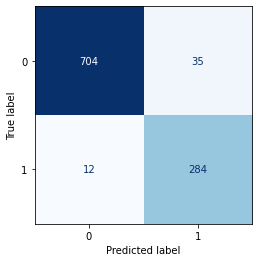

In [154]:
cm1 = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm1, display_labels=[0, 1]).plot(cmap='Blues', colorbar=False)

plt.show()

In [155]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rikyf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [156]:
df = pd.read_csv("data/emails.csv")

In [157]:
stop_words = set(stopwords.words('english'))
drop_f = []
for feature in df.columns:
    if feature in stop_words:
        drop_f.append(feature)
print(drop_f)

['the', 'to', 'and', 'for', 'of', 'a', 'you', 'in', 'on', 'is', 'this', 'i', 'be', 'that', 'will', 'have', 'with', 'your', 'at', 'we', 's', 'are', 'it', 'by', 'as', 'from', 'or', 'not', 'me', 'if', 're', 'any', 'our', 'can', 'd', 'all', 'has', 'was', 'an', 't', 'up', 'should', 'do', 'am', 'out', 'no', 'there', 'but', 'been', 'these', 'so', 'm', 'into', 'they', 'my', 'what', 'only', 'which', 'more', 'about', 'now', 'their', 'some', 'just', 'other', 'here', 'when', 'over', 'them', 'below', 'o', 'he', 'were', 'who', 'don', 'its', 'through', 'had', 'she', 'how', 'being', 'under', 'than', 'off', 'after', 'each', 'll', 'did', 'before', 'then', 'his', 'same', 'does', 'above', 'those', 'down', 'very', 'her', 'such', 'again', 'both', 've', 'until', 'because', 'where', 'further', 'most', 'between', 'own', 'once', 'while', 'during', 'why', 'him', 'few', 'y', 'too', 'having', 'doing', 'didn', 'yourself', 'doesn', 'won', 'against', 'nor', 'myself', 'isn', 'haven', 'whom', 'couldn', 'wasn', 'itself'

In [158]:
df_filtered = df.drop(drop_f, axis=1)
df_filtered

,Email No.,ect,hou,enron,com,gas,deal,meter,hpl,please,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,24,27,1,3,1,0,0,0,2,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,1,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,22,10,0,0,0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,17,9,0,0,2,0,3,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,11,3,1,3,5,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,1,0,0,4,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1


In [159]:
X = df_filtered.drop(columns=['Email No.','Prediction'])
y = df_filtered['Prediction']

y_test,y_pred = spamDetector(X,y)

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       739
           1       0.88      0.96      0.92       296

    accuracy                           0.95      1035
   macro avg       0.93      0.95      0.94      1035
weighted avg       0.95      0.95      0.95      1035



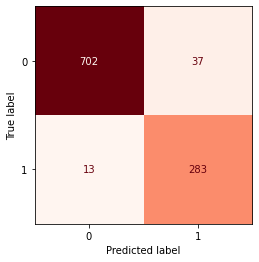

In [160]:
cm2 = confusion_matrix(y_test2, y_pred2)
ConfusionMatrixDisplay(cm2, display_labels=[0, 1]).plot(cmap='Reds', colorbar=False)

plt.show()

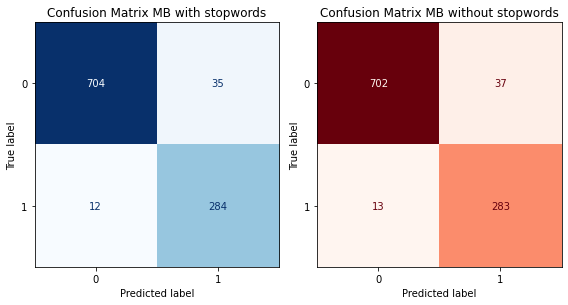

In [161]:
fig, axes = plt.subplots(1, 2, figsize=(8, 6))

ConfusionMatrixDisplay(cm1, display_labels=[0, 1]).plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title("Confusion Matrix MB with stopwords")

ConfusionMatrixDisplay(cm2, display_labels=[0, 1]).plot(ax=axes[1], cmap='Reds', colorbar=False)
axes[1].set_title("Confusion Matrix MB without stopwords")

plt.tight_layout()
plt.show()

In [162]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans

X = df.drop(columns=['Email No.', 'Prediction'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.90)
X_pca = pca.fit_transform(X_scaled)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_pca)

In [163]:
df2 = df

In [164]:
df2['Cluster']=clusters
df2

,Email No.,the,to,ect,and,for,of,a,you,hou,...,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction,Cluster
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,4
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,1,0,0,2
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,4
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,4
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,4
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,1,0,0,2
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,1,4
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,1,0,1,4


In [165]:
X = df2.drop(columns=['Email No.','Prediction'])
y = df2['Prediction']

y_test,y_pred = spamDetector(X,y)

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       739
           1       0.89      0.95      0.92       296

    accuracy                           0.95      1035
   macro avg       0.93      0.95      0.94      1035
weighted avg       0.95      0.95      0.95      1035



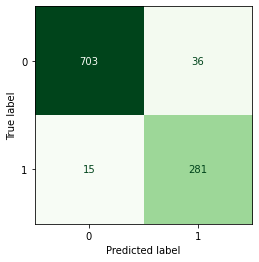

In [166]:
cm3 = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm3, display_labels=[0, 1]).plot(cmap='Greens', colorbar=False)

plt.show()

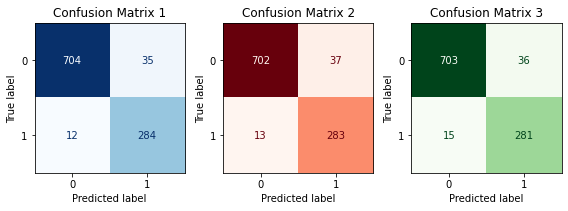

In [167]:
fig, axes = plt.subplots(1, 3, figsize=(8, 6))

ConfusionMatrixDisplay(cm1, display_labels=[0, 1]).plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title("Confusion Matrix 1")

ConfusionMatrixDisplay(cm2, display_labels=[0, 1]).plot(ax=axes[1], cmap='Reds', colorbar=False)
axes[1].set_title("Confusion Matrix 2")

ConfusionMatrixDisplay(cm3, display_labels=[0, 1]).plot(ax=axes[2], cmap='Greens', colorbar=False)
axes[2].set_title("Confusion Matrix 3")

plt.tight_layout()
plt.show()